<a href="https://colab.research.google.com/github/jaderAdriel/Clorofila-a/blob/main/Projeto_pibic_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade gspread
!pip install matplotlib

**Import** the library, authenticate, and create the interface to Sheets

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from gspread import *
import numpy as np

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

Function to find out the year and campaign according to the title of the worksheet

In [ ]:
def get_year_campaign (title):

    title = title.split()
    year = None
    campaing = None

    for digit in title:
        if digit.isnumeric():
            if int(digit) > 2000 and int(digit) < 3000:
                year = digit
            elif int(digit) < 100 and int(digit) > 0:
                campaing = digit

    return year , campaing

In [ ]:
def get_years(worksheets):
    years = []
    for worksheet in worksheets:
        year = get_year_campaign(worksheet.title)
        year = year[0]
        if  year not in years:
            years.append(year)

    return sorted(years)

Return a list of worksheets that contains the word especified on the title

In [ ]:
def get_worksheet(spreadsheet, word = ' '):

    listOfWorksheet = []

    for worksheet in spreadsheet:
        if word in worksheet.title.split():
            listOfWorksheet.append(worksheet)
            
    return listOfWorksheet


In [ ]:
def get_years_campaigns(years):

    years_campaigns = []

    for year in years:
        years_campaigns.append({
        'ano' : str(year),
        'campanha 1' : None,
        'campanha 2' : None,
        'campanha 3' : None,
        'campanha 4' : None,
        })

    return years_campaigns


In [ ]:
def valid_value(value):
    
    validValue = ''
    value = str(value)

    for i in value:
        if i == ',':
            validValue += '.'
        elif i == '<':
            validValue += ''
        else:
            validValue += i

    if value == '':
        return None
    try:
        return float(validValue)
    except:
        return value

In [ ]:
def get_parameter(line, column, worksheets):

    years = get_years(worksheets)
    years_campaigns = get_years_campaigns(years)

    for worksheet in worksheets:
        information = valid_value(worksheet.cell(line, column).value)
        year, campaign = get_year_campaign(worksheet.title)
        for i, yearCampaign in enumerate(years_campaigns):
            if yearCampaign['ano'] == str(year):
                years_campaigns[i]['campanha '+campaign] = information

    return years_campaigns


In [ ]:
url = 'https://docs.google.com/spreadsheets/d/1rc1-itCAyrCJ7xqpMZIAVJINS0oZpyhwqcTY1KWGPZo/edit?usp=sharing'

spreadsheet = gc.open_by_url(url)
parameter_report = get_worksheet(spreadsheet, 'Campanha')

In [ ]:
row = input('Row of the parameter : ')
col = 6

parameterUnitType = parameter_report[0].cell(row, 4).value
parameterName = parameter_report[0].cell(row, 2).value
print(f'\033[1;32m {parameterName} \033[0;0m')

df = pd.DataFrame(get_parameter(row, col, parameter_report))
display(df)

Row of the parameter : 15
 DQO 


,ano,campanha 1,campanha 2,campanha 3,campanha 4
0,2014,NaN,NaN,31.6,NaN
1,2015,20.0,28.9,NaN,NaN
2,2016,47.7,20.0,20.0,NaN
3,2017,23.5,20.0,20.0,20.0
4,2018,20.8,20.0,20.0,20.0
5,2019,20.0,30.0,30.0,30.0
6,2020,30.0,NaN,NaN,NaN
7,2021,30.0,30.0,30.0,NaN


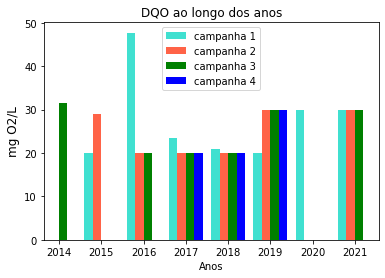

<Figure size 1080x720 with 0 Axes>

In [ ]:
campanha = {
    'campanha 1' : list(df['campanha 1']),
    'campanha 2' : list(df['campanha 2']),
    'campanha 3' : list(df['campanha 3']),
    'campanha 4' : list(df['campanha 4']),
}

x = np.arange(len(list(df['ano'])))

fig, ax = plt.subplots()

largura = 0.2

campanha1 = ax.bar(x - largura*1.5 , campanha['campanha 1'],largura, label = 'campanha 1',color = 'turquoise')
campanha2 = ax.bar(x - largura/2, campanha['campanha 2'],largura, label = 'campanha 2',color = 'tomato')
campanha3 = ax.bar(x + largura/2, campanha['campanha 3'],largura, label = 'campanha 3',color = 'green')
campanha4 = ax.bar(x + largura*1.5, campanha['campanha 4'],largura, label = 'campanha 4',color = 'blue')


plt.figure(figsize=(15,10))
#ax.set_ylim([0,50])
ax.set_title(f'{parameterName} ao longo dos anos')
ax.set_ylabel(parameterUnitType, fontsize = 12)
ax.set_xlabel('Anos')
ax.legend()
ax.set_xticks(x)
ax.set_xticklabels(list(df['ano']))

plt.show()
